<a href="https://colab.research.google.com/github/Datkhoo25/insurance_risk_prediction/blob/main/Risk_Categorization_Problem_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', timeout_ms=300000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install --upgrade scikit-learn==1.4.2

In [3]:
#Import neccesary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xlsxwriter
import xlsxwriter
import builtins
import openpyxl
import joblib

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [4]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [5]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

In [6]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/prudential_dataset/train.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/prudential_dataset/test.csv'
# sample_submission= '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/prudential_dataset/sample_submission.csv'

pd.set_option('display.max_columns', None)

In [7]:
data_df_full = pd.read_csv(data_path, index_col='Id')
print(data_df_full.shape)
data_df_full.head()

(59381, 127)


,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [8]:
test_df_full = pd.read_csv(test_path, index_col='Id')
print(test_df_full .shape)
print("Percentage of Training Data to Overall Dataset (%)", data_df_full.shape[0]*100/(data_df_full .shape[0] + test_df_full .shape[0]), '%')
test_df_full .head()

(19765, 126)
Percentage of Training Data to Overall Dataset (%) 75.02716498622799 %


,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,0.338912,0.472262,0.150,3,1,0.00,2,0.50,2,2,11,3,1,1,1,2,1,1,3,NaN,3,2,3,3,NaN,0.627451,0.760563,NaN,2.0,16,2,2,1,3,1,2,2,NaN,3,2,1,3,NaN,1,2,1,1,2,1,2,1,NaN,2,2,1,1,3,2,3,NaN,3,3,1,3,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,0.311715,0.484984,0.000,1,3,0.07,2,0.20,1,2,8,3,1,1,1,1,1,3,1,0.001667,1,1,2,2,NaN,0.529412,0.746479,NaN,5.0,261,3,1,1,3,2,2,1,NaN,3,2,3,3,110.0,3,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,0.320084,0.519103,0.143,9,1,0.00,2,0.45,1,2,3,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.666667,NaN,0.661972,NaN,3.0,132,2,1,1,3,2,2,2,NaN,3,2,3,3,240.0,1,3,1,1,2,1,2,3,NaN,2,2,3,1,1,2,3,NaN,1,3,1,3,2,1,3,3,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,0.267782,0.486962,0.210,9,1,0.00,2,1.00,2,2,3,3,1,1,1,1,1,3,1,0.000667,2,1,2,2,NaN,0.686275,0.676056,NaN,NaN,162,3,2,1,1,2,3,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,2,3,2,3,NaN,3,1,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,0.246862,0.428718,0.085,9,1,0.00,2,0.20,1,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.449275,NaN,0.380282,NaN,18.0,181,3,1,1,3,2,2,2,NaN,3,2,3,3,188.0,1,3,1,1,2,1,2,1,NaN,1,3,3,1,1,2,3,NaN,3,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

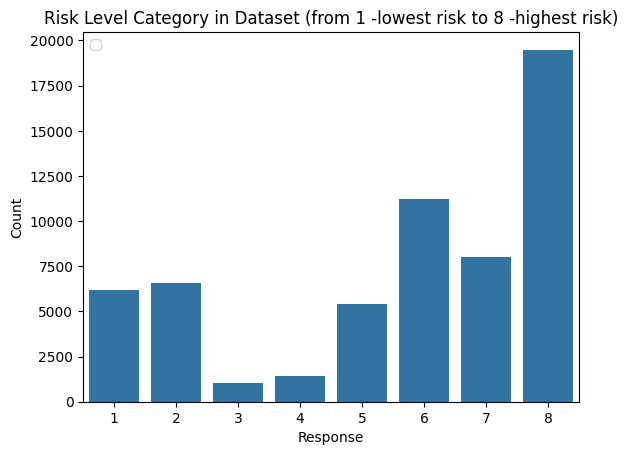

In [9]:
#To get the target of train and get a distrubution chart
data_counts = data_df_full['Response'].value_counts()
min = data_df_full['Response'].min()
max = data_df_full['Response'].max()

sns.countplot(x=data_df_full['Response']);
plt.title(f'Risk Level Category in Dataset (from {min} -lowest risk to {max} -highest risk)')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for readability
plt.legend()
plt.show()

In [10]:
#To unveilthe unique categorical value in Product_Info_2 and then assign a numeric value.
unique_products = [each for each_unit in data_df_full[['Product_Info_2']].value_counts().keys().sort_values(ascending=True) for each in each_unit]

product_dict = {}
for id, each in enumerate(unique_products):
  product_dict[each] = int(id + 1)
print(product_dict)

{'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5, 'A6': 6, 'A7': 7, 'A8': 8, 'B1': 9, 'B2': 10, 'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'E1': 19}


In [11]:
data_df_full = data_df_full.replace({'Product_Info_2': product_dict})
test_df_full = test_df_full.replace({'Product_Info_2': product_dict})

In [12]:
pd.set_option('display.max_rows', None)

na_count_list = (data_df_full.isnull().sum()*100/len(data_df_full)).sort_values(ascending=False)
rule = na_count_list.values > 30
column_to_drop = list(na_count_list[rule].keys())
print("Columns to drop", column_to_drop)

data_df = data_df_full.drop(column_to_drop, axis=1)
test_df = test_df_full.drop(column_to_drop, axis=1)
print("Training df Shape", data_df.shape, "Test df Shape", test_df.shape)

Columns to drop ['Medical_History_10', 'Medical_History_32', 'Medical_History_24', 'Medical_History_15', 'Family_Hist_5', 'Family_Hist_3', 'Family_Hist_2', 'Insurance_History_5', 'Family_Hist_4']
Training df Shape (59381, 118) Test df Shape (19765, 117)


In [13]:
data_types = data_df.dtypes
print(data_types)

Product_Info_1           int64
Product_Info_2           int64
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_7      int64
Insurance_History_8      int64
Insurance_History_9      int64
Family_Hist_1            int64
Medical_

Splitting the Data into Training and Validation Here Onwards to Prevent Data Leak

#For runs without N/A removed, without outlier removed, without freq encoding, and RFE

In [14]:
print(data_df_full.shape)
data_target_full = data_df_full.iloc[:, -1]
print(data_df_full.shape)
data_df_full = data_df_full.iloc[:, :-1]
print(data_df_full.shape)

(59381, 127)
(59381, 127)
(59381, 126)


In [15]:
X_train_wNA, X_val_wNA, y_train, y_val = train_test_split(data_df_full, data_target_full, test_size=0.2, random_state=42)

In [16]:
X_train_wNA['Medical_History_1'].dtypes

dtype('float64')

In [17]:
def num_cat_split(X_train, X_val, test_df_full):

  X_train_cat = X_train.select_dtypes(include=['int64'])
  X_train_num = X_train.select_dtypes(include=['float64'])

  X_val_cat = X_val.select_dtypes(include=['int64'])
  X_val_num = X_val.select_dtypes(include=['float64'])

  test_df_cat = test_df_full.select_dtypes(include=['int64'])
  test_df_num = test_df_full.select_dtypes(include=['float64'])

  cat_col_name = list(X_train_cat.columns)
  num_col_name= list(X_train_num.columns)
  combined_col_name = num_col_name + cat_col_name
  return X_train_cat, X_train_num, X_val_cat, X_val_num, test_df_cat, test_df_num, combined_col_name, cat_col_name , num_col_name

In [18]:
def One_hot(X_train, X_val, test_df, X_train_Num1, X_val_Num1, test_df_Num1, cat_col_name, num_col_name):
    df_train_index = X_train_Num1.index.tolist()  # Get index as list for DataFrame reconstruction
    df_val_index = X_val_Num1.index.tolist()
    df_test_index = test_df_Num1.index.tolist()

    # Initialize OneHotEncoder with handle_unknown='ignore'
    encoder = OneHotEncoder(handle_unknown='ignore')

    # Fit and transform categorical data
    X_train_dum = encoder.fit_transform(X_train[cat_col_name])
    X_val_dum = encoder.transform(X_val[cat_col_name])  # Use transform() for validation set
    test_df_dum = encoder.transform(test_df[cat_col_name])  # Use transform() for test set

    # Convert sparse matrix to DataFrame with column names
    cat_columns = list(encoder.get_feature_names_out(cat_col_name))
    X_train_dum = pd.DataFrame(X_train_dum.toarray(), columns=cat_columns, index=df_train_index)
    X_val_dum = pd.DataFrame(X_val_dum.toarray(), columns=cat_columns, index=df_val_index)
    test_df_dum = pd.DataFrame(test_df_dum.toarray(), columns=cat_columns, index=df_test_index)

    # Handle numerical data (no imputation needed)
    X_train_Num = pd.DataFrame(X_train_Num1, columns=num_col_name, index=df_train_index)
    X_val_Num = pd.DataFrame(X_val_Num1, columns=num_col_name, index=df_val_index)
    test_df_Num = pd.DataFrame(test_df_Num1, columns=num_col_name, index=df_test_index)

    # Combine numerical and encoded categorical data
    X_train_full = pd.concat([X_train_Num, X_train_dum], axis=1)
    X_val_full = pd.concat([X_val_Num, X_val_dum], axis=1)
    test_df_full = pd.concat([test_df_Num, test_df_dum], axis=1)

    return X_train_full, X_val_full, test_df_full

In [19]:
def iterative_rfe(X_train, y_train, X_val, X_test, model, n_features_to_remove, final_n_features, original_feature_names):
    while X_train.shape[1] > final_n_features:
        # Number of features to select in this iteration
        shape_now = int(X_train.shape[1])
        n_features_to_select = builtins.max(final_n_features, shape_now - n_features_to_remove)

        # Fit the model if it has not been fitted
        if not hasattr(model, 'coef_') and not hasattr(model, 'feature_importances_'):
            model.fit(X_train, y_train)

        # Apply RFE
        rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
        rfe.fit(X_train, y_train)

        # Get ranking of features (True means selected, False means not selected)
        selected_indices = rfe.support_

        # Retrieve original column names of selected features
        selected_feature_names = [name for name, selected in zip(original_feature_names, selected_indices) if selected]

        # Create DataFrames with selected features
        X_train_selected = pd.DataFrame(rfe.transform(X_train), columns=selected_feature_names)
        X_val_selected = pd.DataFrame(rfe.transform(X_val), columns=selected_feature_names)
        X_test_selected = pd.DataFrame(rfe.transform(X_test), columns=selected_feature_names)

        # Update X_train, X_val, X_test with selected features
        X_train = X_train_selected
        X_val = X_val_selected
        X_test = X_test_selected

        # Print the number of features after each iteration
        print(f"Number of features after this iteration: {X_train_selected.shape[1]}")

    return X_train_selected, X_val_selected, X_test_selected

In [20]:
def excel_writer_func(df_list, df_list_name, workbook_path):
  excel_writer = xlsxwriter.Workbook(workbook_path, {'nan_inf_to_errors': True})

  for i, data in enumerate(df_list):
      sheet_name = df_list_name[i]
      worksheet = excel_writer.add_worksheet(sheet_name)

      if isinstance(data, pd.DataFrame):
          # Write headers (column names)
          for col_num, col_name in enumerate(data.columns):
              worksheet.write(0, col_num, col_name)

          # Write data rows
          for row_num, row_data in enumerate(data.values):
              for col_num, col_value in enumerate(row_data):
                  worksheet.write(row_num + 1, col_num, col_value)

      elif isinstance(data, pd.Series):
          # Write series data directly
          for row_num, value in enumerate(data.values):
              worksheet.write(row_num + 1, 0, value)

  # Close the workbook (save the Excel file)
  excel_writer.close()

In [21]:
X_train_cat_wNA, X_train_num_wNA, X_val_cat_wNA, X_val_num_wNA, test_df_cat_wNA, test_df_num_wNA, combined_col_name_wNA, cat_col_name_wNA, num_col_name_wNA = num_cat_split(X_train_wNA, X_val_wNA, test_df_full)

In [22]:
X_train_wNA.dtypes

Product_Info_1           int64
Product_Info_2           int64
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
Insurance_History_7      int64
Insurance_History_8      int64
Insurance_History_9      int64
Family_H

No Impute

In [23]:
#NO IMPUTATION
X_train_no_imp_wNA, X_val_no_imp_wNA, test_df_no_imp_wNA = One_hot(X_train_cat_wNA, X_val_cat_wNA, test_df_cat_wNA, X_train_num_wNA , X_val_num_wNA, test_df_num_wNA,  cat_col_name_wNA, num_col_name_wNA)

In [29]:
X_train_no_imp_wNA.head(3)

,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32,Product_Info_1_1,Product_Info_1_2,Product_Info_2_1,Product_Info_2_2,Product_Info_2_3,Product_Info_2_4,Product_Info_2_5,Product_Info_2_6,Product_Info_2_7,Product_Info_2_8,Product_Info_2_9,Product_Info_2_10,Product_Info_2_11,Product_Info_2_12,Product_Info_2_13,Product_Info_2_14,Product_Info_2_15,Product_Info_2_16,Product_Info_2_17,Product_Info_2_18,Product_Info_2_19,Product_Info_3_2,Product_Info_3_3,Product_Info_3_4,Product_Info_3_6,Product_Info_3_8,Product_Info_3_9,Product_Info_3_10,Product_Info_3_11,Product_Info_3_12,Product_Info_3_15,Product_Info_3_16,Product_Info_3_17,Product_Info_3_18,Product_Info_3_19,Product_Info_3_20,Product_Info_3_21,Product_Info_3_22,Product_Info_3_23,Product_Info_3_24,Product_Info_3_26,Product_Info_3_27,Product_Info_3_28,Product_Info_3_29,Product_Info_3_30,Product_Info_3_31,Product_Info_3_32,Product_Info_3_33,Product_Info_3_36,Product_Info_3_37,Product_Info_3_38,Product_Info_5_2,Product_Info_5_3,Product_Info_6_1,Product_Info_6_3,Product_Info_7_1,Product_Info_7_2,Product_Info_7_3,Employment_Info_2_1,Employment_Info_2_2,Employment_Info_2_3,Employment_Info_2_4,Employment_Info_2_5,Employment_Info_2_6,Employment_Info_2_7,Employment_Info_2_9,Employment_Info_2_10,Employment_Info_2_11,Employment_Info_2_12,Employment_Info_2_13,Employment_Info_2_14,Employment_Info_2_15,Employment_Info_2_16,Employment_Info_2_18,Employment_Info_2_19,Employment_Info_2_20,Employment_Info_2_21,Employment_Info_2_22,Employment_Info_2_23,Employment_Info_2_25,Employment_Info_2_26,Employment_Info_2_27,Employment_Info_2_29,Employment_Info_2_30,Employment_Info_2_31,Employment_Info_2_32,Employment_Info_2_33,Employment_Info_2_34,Employment_Info_2_35,Employment_Info_2_36,Employment_Info_2_37,Employment_Info_3_1,Employment_Info_3_3,Employment_Info_5_2,Employment_Info_5_3,InsuredInfo_1_1,InsuredInfo_1_2,InsuredInfo_1_3,InsuredInfo_2_2,InsuredInfo_2_3,InsuredInfo_3_1,InsuredInfo_3_2,InsuredInfo_3_3,InsuredInfo_3_4,InsuredInfo_3_5,InsuredInfo_3_6,InsuredInfo_3_7,InsuredInfo_3_8,InsuredInfo_3_9,InsuredInfo_3_10,InsuredInfo_3_11,InsuredInfo_4_2,InsuredInfo_4_3,InsuredInfo_5_1,InsuredInfo_5_3,InsuredInfo_6_1,InsuredInfo_6_2,InsuredInfo_7_1,InsuredInfo_7_3,Insurance_History_1_1,Insurance_History_1_2,Insurance_History_2_1,Insurance_History_2_2,Insurance_History_2_3,Insurance_History_3_1,Insurance_History_3_2,Insurance_History_3_3,Insurance_History_4_1,Insurance_History_4_2,Insurance_History_4_3,Insurance_History_7_1,Insurance_History_7_2,Insurance_History_7_3,Insurance_History_8_1,Insurance_History_8_2,Insurance_History_8_3,Insurance_History_9_1,Insurance_History_9_2,Insurance_History_9_3,Family_Hist_1_1,Family_Hist_1_2,Family_Hist_1_3,Medical_History_2_1,Medical_History_2_2,Medical_History_2_3,Medical_History_2_5,Medical_History_2_7,Medical_History_2_8,Medical_History_2_9,Medical_History_2_10,Medical_History_2_12,Medical_History_2_13,Medical_History_2_14,Medical_History_2_15,Medical_History_2_16,Medical_History_2_17,Medical_History_2_18,Medical_History_2_19,Medical_History_2_20,Medical_History_2_21,Medical_History_2_22,Medical_History_2_23,Medical_History_2_24,Medical_History_2_25,Medical_History_2_26,Medical_History_2_27,Medical_History_2_28,Medical_History_2_29,Medical_History_2_30,Medical_History_2_32,Medical_History_2_33,Medical_History_2_34,Medical_History_2_35,Medical_History_2_36,Medical_History_2_37,Medical_History_2_38,Medical_History_2_39,Medical_History_2_40,Medical_History_2_41,Medical_History_2_42,Medical_History_2_43,Medical_History_2_44,Medical_History_2_45,Medical_History_2_47,Medical_History_2_48,Medical_History_2_50,Medical_History_2_51,Medical_History_2_52,Medical_History_2_53,Medical_History_2_54,Medical_History_2_55,Medical_History_2_56,Medical_History_2_57,Medical_History_2_5

In [25]:
y_train.head(3)

Id
3633     2
39326    3
58070    6
Name: Response, dtype: int64

In [ ]:
# X_train_no_imp_wNA111 = X_train_no_imp_wNA.head(100)
# X_val_no_imp_wNA111 = X_val_no_imp_wNA.head(100)
# test_df_no_imp_wNA111 = test_df_no_imp_wNA.head(100)
# y_train111 = y_train.head(100)
# y_val111 = y_val.head(100)

In [ ]:
#Feature Selection Part for No Impute Set
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

In [ ]:
# Ensure final_n_features and n_features_to_remove are integers
final_n_features = 200
n_features_to_remove = 100
original_feature_names = list(X_train_no_imp_wNA.columns)

# # Call iterative_rfe with correct arguments
X_train_no_imp_wNA_dt_rfe, X_val_no_imp_wNA_dt_rfe, test_df_no_imp_wNA_dt_rfe = iterative_rfe(X_train_no_imp_wNA, y_train, X_val_no_imp_wNA, test_df_no_imp_wNA, model=model_dt, n_features_to_remove=n_features_to_remove, final_n_features=final_n_features, original_feature_names=original_feature_names)

Number of features after this iteration: 803
Number of features after this iteration: 703
Number of features after this iteration: 603
Number of features after this iteration: 503
Number of features after this iteration: 403
Number of features after this iteration: 303
Number of features after this iteration: 203
Number of features after this iteration: 200


In [ ]:
X_train_no_imp_wNA_rf_rfe, X_val_no_imp_wNA_rf_rfe, test_df_no_imp_wNA_rf_rfe = iterative_rfe(X_train_no_imp_wNA, y_train, X_val_no_imp_wNA, test_df_no_imp_wNA, model=model_rf, n_features_to_remove=n_features_to_remove, final_n_features=final_n_features, original_feature_names=original_feature_names)

Number of features after this iteration: 803
Number of features after this iteration: 703
Number of features after this iteration: 603
Number of features after this iteration: 503
Number of features after this iteration: 403
Number of features after this iteration: 303
Number of features after this iteration: 203
Number of features after this iteration: 200


In [ ]:
#No_imp_wNA dt RFE
List_no_imp_wNA_dt_rfe = [X_train_no_imp_wNA_dt_rfe, X_val_no_imp_wNA_dt_rfe, test_df_no_imp_wNA_dt_rfe, y_train, y_val]
Name_List_no_imp_wNA_dt_rfe = ['X_train_no_imp_wNA_dt_rfe', 'X_val_no_imp_wNA_dt_rfe', 'test_df_no_imp_wNA_dt_rfe', 'y_train', 'y_val']

# Create a workbook and add worksheets for each DataFrame or Series
workbook_path_No_Impute_dt_wNA = '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/Preprocessing_Checkpoint/No_Impute_wNA_dt_rfe.xlsx'
no_imp_wNA_rf_rfe = excel_writer_func(List_no_imp_wNA_dt_rfe, Name_List_no_imp_wNA_dt_rfe, workbook_path_No_Impute_dt_wNA)

In [ ]:
#No_imp_wNA rf RFE
List_no_imp_wNA_rf_rfe = [X_train_no_imp_wNA_rf_rfe, X_val_no_imp_wNA_rf_rfe, test_df_no_imp_wNA_rf_rfe, y_train, y_val]
Name_List_no_imp_wNA_rf_rfe = ['X_train_no_imp_wNA_rf_rfe', 'X_val_no_imp_wNA_rf_rfe', 'test_df_no_imp_wNA_rf_rfe', 'y_train', 'y_val']

# Create a workbook and add worksheets for each DataFrame or Series
workbook_path_No_Impute_dt_wNA = '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/Preprocessing_Checkpoint/No_Impute_wNA_rf_rfe.xlsx'
no_imp_wNA_rf_rfe = excel_writer_func(List_no_imp_wNA_rf_rfe, Name_List_no_imp_wNA_rf_rfe, workbook_path_No_Impute_dt_wNA)

Simple Impute

In [ ]:
#Simple Imputation using Mean
imp_mean = SimpleImputer(strategy='mean')
X_train_simp_num_wNA = imp_mean.fit_transform(X_train_num_wNA)
X_val_simp_num_wNA = imp_mean.fit_transform(X_val_num_wNA)
X_test_simp_num_wNA = imp_mean.fit_transform(test_df_num_wNA)

X_train_simp_num_wNA = pd.DataFrame(X_train_simp_num_wNA, columns=X_train_num_wNA.columns)
X_val_simp_num_wNA = pd.DataFrame(X_val_simp_num_wNA, columns=X_val_num_wNA.columns)
X_test_simp_num_wNA = pd.DataFrame(X_test_simp_num_wNA, columns=test_df_num_wNA.columns)


#SIMPLE IMPUTATION: To impute the categorical data
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

X_train_simp_cat_wNA = imp_mode.fit_transform(X_train_cat_wNA)
X_val_simp_cat_wNA = imp_mode.fit_transform(X_val_cat_wNA)
test_df_simp_cat_wNA = imp_mode.fit_transform(test_df_cat_wNA)

X_train_simp_cat_wNA = pd.DataFrame(X_train_simp_cat_wNA, columns=X_train_cat_wNA.columns)
X_val_simp_cat_wNA = pd.DataFrame(X_val_simp_cat_wNA, columns=X_val_cat_wNA.columns)
test_df_simp_cat_wNA = pd.DataFrame(test_df_simp_cat_wNA, columns=test_df_cat_wNA.columns)

In [ ]:
X_train_SIM_imp_wNA, X_val_SIM_imp_wNA, test_df_SIM_imp_wNA = One_hot(X_train_simp_cat_wNA, X_val_simp_cat_wNA, test_df_simp_cat_wNA , X_train_simp_num_wNA , X_val_simp_num_wNA, X_test_simp_num_wNA,  cat_col_name_wNA, num_col_name_wNA)

In [ ]:
#Decision Tree RFE
X_train_sim_imp_wNA_dt_rfe, X_val_sim_imp_wNA_dt_rfe, test_df_sim_imp_wNA_dt_rfe = iterative_rfe(X_train_SIM_imp_wNA, y_train, X_val_SIM_imp_wNA, test_df_SIM_imp_wNA, model=model_dt, n_features_to_remove=n_features_to_remove, final_n_features=final_n_features, original_feature_names=original_feature_names)

Number of features after this iteration: 803
Number of features after this iteration: 703
Number of features after this iteration: 603
Number of features after this iteration: 503
Number of features after this iteration: 403
Number of features after this iteration: 303
Number of features after this iteration: 203
Number of features after this iteration: 200


In [ ]:
#Random Forest RFE
X_train_sim_imp_wNA_rf_rfe, X_val_sim_imp_wNA_rf_rfe, test_df_sim_imp_wNA_rf_rfe = iterative_rfe(X_train_SIM_imp_wNA, y_train, X_val_SIM_imp_wNA, test_df_SIM_imp_wNA, model=model_rf, n_features_to_remove=n_features_to_remove, final_n_features=final_n_features, original_feature_names=original_feature_names)

Number of features after this iteration: 803
Number of features after this iteration: 703
Number of features after this iteration: 603
Number of features after this iteration: 503
Number of features after this iteration: 403
Number of features after this iteration: 303
Number of features after this iteration: 203
Number of features after this iteration: 200


In [ ]:
#Sim_imp_wNA dt RFE
List_sim_imp_wNA_dt_rfe = [X_train_sim_imp_wNA_dt_rfe, X_val_sim_imp_wNA_dt_rfe, test_df_sim_imp_wNA_dt_rfe, y_train, y_val]
Name_List_sim_imp_wNA_dt_rfe = ['X_train_sim_imp_wNA_dt_rfe', 'X_val_sim_imp_wNA_dt_rfe', 'test_df_sim_imp_wNA_dt_rfe', 'y_train', 'y_val']

# Create a workbook and add worksheets for each DataFrame or Series
workbook_path_Sim_Impute_dt_wNA = '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/Preprocessing_Checkpoint/Sim_Impute_wNA_dt_rfe.xlsx'
no_imp_wNA_rf_rfe = excel_writer_func(List_sim_imp_wNA_dt_rfe, Name_List_sim_imp_wNA_dt_rfe, workbook_path_Sim_Impute_dt_wNA )

In [ ]:
#Sim_imp_wNA rf RFE
List_sim_imp_wNA_rf_rfe = [X_train_sim_imp_wNA_rf_rfe, X_val_sim_imp_wNA_rf_rfe, test_df_sim_imp_wNA_rf_rfe , y_train, y_val]
Name_List_sim_imp_wNA_rf_rfe = ['X_train_sim_imp_wNA_rf_rfe', 'X_val_sim_imp_wNA_rf_rfe', 'test_df_sim_imp_wNA_rf_rfe', 'y_train', 'y_val']

# Create a workbook and add worksheets for each DataFrame or Series
workbook_path_Sim_Impute_dt_wNA = '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/Preprocessing_Checkpoint/Sim_Impute_wNA_rf_rfe.xlsx'
no_imp_wNA_rf_rfe = excel_writer_func(List_sim_imp_wNA_rf_rfe, Name_List_sim_imp_wNA_rf_rfe, workbook_path_Sim_Impute_dt_wNA)

KNN Impute

In [ ]:
#KNN Imputation
# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform on training data
X_train_knn_imputed_wNA = knn_imputer.fit_transform(X_train_no_imp_wNA)

# Transform validation and test data (using the same imputer learned from training data)
X_val_knn_imputed_wNA = knn_imputer.transform(X_val_no_imp_wNA)
test_df_knn_imputed_wNA = knn_imputer.transform(test_df_no_imp_wNA)

# Convert back to DataFrame (if necessary)
X_train_knn_imputed_wNA = pd.DataFrame(X_train_knn_imputed_wNA, columns=X_train_no_imp_wNA.columns)
X_val_knn_imputed_wNA = pd.DataFrame(X_val_knn_imputed_wNA, columns=X_val_no_imp_wNA.columns)
test_df_knn_imputed_wNA = pd.DataFrame(test_df_knn_imputed_wNA, columns=test_df_no_imp_wNA.columns)

In [ ]:
# Ensure final_n_features and n_features_to_remove are integers
final_n_features = 200
n_features_to_remove = 100
original_feature_names = list(X_train_no_imp_wNA.columns)

In [ ]:
#Decision Tree RFE
X_train_knn_imp_wNA_dt_rfe, X_val_knn_imp_wNA_dt_rfe, test_df_knn_imp_wNA_dt_rfe = iterative_rfe(X_train_knn_imputed_wNA, y_train, X_val_knn_imputed_wNA, test_df_knn_imputed_wNA, model=model_dt, n_features_to_remove=n_features_to_remove, final_n_features=final_n_features, original_feature_names=original_feature_names)

Number of features after this iteration: 807
Number of features after this iteration: 707
Number of features after this iteration: 607
Number of features after this iteration: 507
Number of features after this iteration: 407
Number of features after this iteration: 307
Number of features after this iteration: 207
Number of features after this iteration: 200


In [ ]:
#Random Forest RFE
X_train_knn_imp_wNA_rf_rfe, X_val_knn_imp_wNA_rf_rfe, test_df_knn_imp_wNA_rf_rfe = iterative_rfe(X_train_knn_imputed_wNA, y_train, X_val_knn_imputed_wNA, test_df_knn_imputed_wNA, model=model_rf, n_features_to_remove=n_features_to_remove, final_n_features=final_n_features, original_feature_names=original_feature_names)

Number of features after this iteration: 807
Number of features after this iteration: 707
Number of features after this iteration: 607
Number of features after this iteration: 507
Number of features after this iteration: 407
Number of features after this iteration: 307
Number of features after this iteration: 207
Number of features after this iteration: 200


In [ ]:
#KNN_imp_wNA dt RFE
List_knn_imp_wNA_dt_rfe = [X_train_knn_imp_wNA_dt_rfe, X_val_knn_imp_wNA_dt_rfe, test_df_knn_imp_wNA_dt_rfe, y_train, y_val]
Name_List_knn_imp_wNA_dt_rfe = ['X_train_knn_imp_wNA_dt_rfe', 'X_val_knn_imp_wNA_dt_rfe', 'test_df_knn_imp_wNA_dt_rfe', 'y_train', 'y_val']

# Create a workbook and add worksheets for each DataFrame or Series
workbook_path_knn_Impute_dt_wNA = '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/Preprocessing_Checkpoint/knn_Impute_wNA_dt_rfe.xlsx'
no_imp_wNA_rf_rfe = excel_writer_func(List_knn_imp_wNA_dt_rfe, Name_List_knn_imp_wNA_dt_rfe, workbook_path_knn_Impute_dt_wNA )

In [ ]:
#KNN_imp_wNA rf RFE
List_knn_imp_wNA_rf_rfe = [X_train_knn_imp_wNA_rf_rfe, X_val_knn_imp_wNA_rf_rfe, test_df_knn_imp_wNA_rf_rfe, y_train, y_val]
Name_List_knn_imp_wNA_rf_rfe = ['X_train_knn_imp_wNA_rf_rfe', 'X_val_knn_imp_wNA_rf_rfe', 'test_df_knn_imp_wNA_rf_rfe', 'y_train', 'y_val']

# Create a workbook and add worksheets for each DataFrame or Series
workbook_path_knn_Impute_rf_wNA = '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/Preprocessing_Checkpoint/knn_Impute_wNA_rf_rfe.xlsx'
no_imp_wNA_rf_rfe = excel_writer_func(List_knn_imp_wNA_rf_rfe, Name_List_knn_imp_wNA_rf_rfe , workbook_path_knn_Impute_rf_wNA)

Bayesian Ridge

In [ ]:
na_count_list = (X_train_no_imp_wNA.isnull().sum()*100/len(data_df_full)).sort_values(ascending=False)
rule = na_count_list.values > 30
column_to_drop = list(na_count_list[rule].keys())
print("Columns to drop", column_to_drop)

X_train_no_imp_wNA = X_train_no_imp_wNA.drop(column_to_drop, axis=1)
X_val_no_imp_wNA = X_val_no_imp_wNA.drop(column_to_drop, axis=1)
test_df_no_imp_wNA = test_df_no_imp_wNA.drop(column_to_drop, axis=1)

Columns to drop ['Medical_History_10', 'Medical_History_32', 'Medical_History_24', 'Medical_History_15', 'Family_Hist_5', 'Family_Hist_3', 'Family_Hist_2', 'Insurance_History_5']


In [ ]:
def chunked_imputation_fit(X, chunk_size, imputer, checkpoint_path):
    n_chunks = int(np.ceil(X.shape[0] / chunk_size))
    for i in range(n_chunks):
        start = i * chunk_size
        end =builtins.min((i + 1) * chunk_size, X.shape[0])
        X_chunk = X[start:end]
        print(X_chunk.shape)
        X_chunk_imputed = imputer.fit_transform(X_chunk)
        print(X_chunk_imputed.shape)
        joblib.dump(X_chunk_imputed, f"{checkpoint_path}_chunk_{i}.pkl")
        print(f"Chunk {i+1}/{n_chunks} imputed and saved.")
    return n_chunks

def chunked_imputation_transform(X, chunk_size, imputer, checkpoint_path):
    n_chunks = int(np.ceil(X.shape[0] / chunk_size))
    for i in range(n_chunks):
        start = i * chunk_size
        end = builtins.min((i + 1) * chunk_size, X.shape[0])
        X_chunk = X[start:end]
        X_chunk_imputed = imputer.transform(X_chunk)
        print(X_chunk_imputed.shape)
        joblib.dump(X_chunk_imputed, f"{checkpoint_path}_chunk_{i}.pkl")
        print(f"Chunk {i+1}/{n_chunks} imputed and saved.")
    return n_chunks

def load_and_concatenate_chunks(n_chunks, checkpoint_path, columns):
    chunks = []
    for i in range(n_chunks):
        X_chunk_imputed = joblib.load(f"{checkpoint_path}_chunk_{i}.pkl")
        chunks.append(pd.DataFrame(X_chunk_imputed, columns=columns))
    return pd.concat(chunks, axis=0)



In [ ]:
# Ensure directories exist
import os
checkpoint_dir = "/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/Bayesian_ridge_imputation_cp"
os.makedirs(checkpoint_dir, exist_ok=True)

train_checkpoint = os.path.join(checkpoint_dir, "train")
val_checkpoint = os.path.join(checkpoint_dir, "val")
test_checkpoint = os.path.join(checkpoint_dir, "test")


# Initialize Iterative Imputer with Bayesian Ridge estimator
mice_imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=5, random_state=42)

In [ ]:
# Chunk size
chunk_size = 10000

# Perform chunked imputation for training data (fit and transform)
n_chunks_train = chunked_imputation_fit(X_train_no_imp_wNA, chunk_size, mice_imputer, train_checkpoint)

# Perform chunked imputation for validation data (transform only)
n_chunks_val = chunked_imputation_transform(X_val_no_imp_wNA, chunk_size, mice_imputer, val_checkpoint)

# Perform chunked imputation for test data (transform only)
n_chunks_test = chunked_imputation_transform(test_df_no_imp_wNA, chunk_size, mice_imputer, test_checkpoint)

(10000, 899)
(10000, 899)
Chunk 1/5 imputed and saved.
(10000, 899)
(10000, 899)
Chunk 2/5 imputed and saved.
(10000, 899)
(10000, 899)
Chunk 3/5 imputed and saved.
(10000, 899)
(10000, 899)
Chunk 4/5 imputed and saved.
(7504, 899)
(7504, 899)
Chunk 5/5 imputed and saved.
(10000, 899)
Chunk 1/2 imputed and saved.
(1877, 899)
Chunk 2/2 imputed and saved.
(10000, 899)
Chunk 1/2 imputed and saved.
(9765, 899)
Chunk 2/2 imputed and saved.


In [ ]:
# Load and concatenate imputed training data
X_train_cat_mice_wNA = load_and_concatenate_chunks(n_chunks_train, train_checkpoint, X_train_no_imp_wNA.columns)
# Load and concatenate imputed validation data
X_val_cat_mice_wNA = load_and_concatenate_chunks(n_chunks_val, val_checkpoint, X_val_no_imp_wNA.columns)
# Load and concatenate imputed test data
test_df_cat_mice_wNA = load_and_concatenate_chunks(n_chunks_test, test_checkpoint, test_df_no_imp_wNA.columns)

# Print the imputed data

print("Imputed Training Data:\n", X_train_cat_mice_wNA.head(4))

print("Imputed Validation Data:\n", X_val_cat_mice_wNA.head(4))

print("Imputed Test Data:\n", test_df_cat_mice_wNA.head(4))

Streaming output truncated to the last 5000 lines.
2              0.0              1.0                  0.0                  0.0   
3              0.0              1.0                  0.0                  0.0   

   Medical_History_2_3  Medical_History_2_5  Medical_History_2_7  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   

   Medical_History_2_8  Medical_History_2_9  Medical_History_2_10  \
0                  0.0                  0.0                   0.0   
1                  0.0                  0.0                   0.0   
2                  0.0                  0.0                   0.0   
3                  0.0                  0.0                   0.0   

   Medical_History_2_12  Medical_History_2_13  Medical_History_2_14  \
0                   0.0     

In [ ]:
#Decision Tree RFE
X_train_bayes_imp_wNA_dt_rfe, X_val_bayes_imp_wNA_dt_rfe, test_df_bayes_imp_wNA_dt_rfe = iterative_rfe(X_train_cat_mice_wNA, y_train, X_val_cat_mice_wNA, test_df_cat_mice_wNA , model=model_dt, n_features_to_remove=n_features_to_remove, final_n_features=final_n_features, original_feature_names=original_feature_names)

Number of features after this iteration: 799
Number of features after this iteration: 699
Number of features after this iteration: 599
Number of features after this iteration: 499
Number of features after this iteration: 399
Number of features after this iteration: 299
Number of features after this iteration: 200


In [ ]:
#Random Forest RFE
X_train_bayes_imp_wNA_rf_rfe, X_val_bayes_imp_wNA_rf_rfe, test_df_bayes_imp_wNA_rf_rfe = iterative_rfe(X_train_cat_mice_wNA, y_train, X_val_cat_mice_wNA, test_df_cat_mice_wNA , model=model_rf, n_features_to_remove=n_features_to_remove, final_n_features=final_n_features, original_feature_names=original_feature_names)

Number of features after this iteration: 799
Number of features after this iteration: 699
Number of features after this iteration: 599
Number of features after this iteration: 499
Number of features after this iteration: 399
Number of features after this iteration: 299
Number of features after this iteration: 200


In [ ]:
#Bayesian Ridge_imp_wNA dt RFE
List_bayes_imp_wNA_dt_rfe = [X_train_bayes_imp_wNA_dt_rfe, X_val_bayes_imp_wNA_dt_rfe, test_df_bayes_imp_wNA_dt_rfe, y_train, y_val]
Name_List_bayes_imp_wNA_dt_rfe = ['X_train_bayes_imp_wNA_dt_rfe', 'X_val_bayes_imp_wNA_dt_rfe', 'test_df_bayes_imp_wNA_dt_rfe', 'y_train', 'y_val']

# Create a workbook and add worksheets for each DataFrame or Series
workbook_path_bayes_Impute_dt_wNA = '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/Preprocessing_Checkpoint/bayes_Impute_wNA_dt_rfe.xlsx'
no_imp_wNA_rf_rfe = excel_writer_func(List_bayes_imp_wNA_dt_rfe , Name_List_bayes_imp_wNA_dt_rfe, workbook_path_bayes_Impute_dt_wNA)

In [ ]:
#Bayesian Ridge_imp_wNA rf RFE
List_bayes_imp_wNA_rf_rfe = [X_train_bayes_imp_wNA_rf_rfe, X_val_bayes_imp_wNA_rf_rfe, test_df_bayes_imp_wNA_rf_rfe, y_train, y_val]
Name_List_bayes_imp_wNA_rf_rfe = ['X_train_bayes_imp_wNA_rf_rfe', 'X_val_bayes_imp_wNA_rf_rfe', 'test_df_bayes_imp_wNA_rf_rfe', 'y_train', 'y_val']

# Create a workbook and add worksheets for each DataFrame or Series
workbook_path_bayes_Impute_rf_wNA = '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/Preprocessing_Checkpoint/bayes_Impute_wNA_rf_rfe.xlsx'
no_imp_wNA_rf_rfe = excel_writer_func(List_bayes_imp_wNA_rf_rfe , Name_List_bayes_imp_wNA_rf_rfe, workbook_path_bayes_Impute_rf_wNA)

#For runs with N/A removed, with outlier removed, with frequency encoding and no RFE

In [ ]:
#X_train_cat_wNA, X_train_num_wNA, X_val_cat_wNA, X_val_num_wNA, test_df_cat_wNA, test_df_num_wNA, combined_col_name_wNA, cat_col_name_wNA, num_col_name_wNA

In [24]:
#To check for outliers
print(X_train_num_wNA.describe())
print( X_val_num_wNA.describe())

       Product_Info_4       Ins_Age            Ht            Wt           BMI  \
count    47504.000000  47504.000000  47504.000000  47504.000000  47504.000000   
mean         0.329388      0.405773      0.707214      0.292427      0.469229   
std          0.282562      0.197419      0.074267      0.089011      0.121908   
min          0.000000      0.000000      0.090909      0.000000      0.000000   
25%          0.076923      0.238806      0.654545      0.225941      0.385884   
50%          0.230769      0.402985      0.709091      0.288703      0.451275   
75%          0.487179      0.567164      0.763636      0.345188      0.531609   
max          1.000000      1.000000      1.000000      1.000000      1.000000   

       Employment_Info_1  Employment_Info_4  Employment_Info_6  \
count       47492.000000       42106.000000       38877.000000   
mean            0.077602           0.006273           0.362195   
std             0.082187           0.032331           0.349867   
min   

NUMERICAL DATA PRE-PROCESSING

In [25]:
def remove_outlier(df, column_name, z_score_threshold):
  # Calculate z-scores for each column
  z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
  # Define threshold for outliers (e.g., z-score > 3)
  z_score_threshold = z_score_threshold
  filter = z_scores < z_score_threshold

  # Filter rows where any column has a z-score greater than the threshold
  df = df[filter]
  return df


Outlier Removal

In [26]:
X_train_num_wNA_out = remove_outlier(X_train_num_wNA, X_train_num_wNA.columns, z_score_threshold = 5)
X_val_num_wNA_out = remove_outlier(X_val_num_wNA, X_val_num_wNA.columns, z_score_threshold = 5)
test_df_num_wNA_out = remove_outlier(test_df_num_wNA, test_df_num_wNA.columns, z_score_threshold = 5)


In [27]:
X_train_num_wNA.shape

(47504, 18)

CATEGORICAL DATA PRE-PROCESSING

In [28]:
#To find out the number of categories of each "categorical" columns
#To get the name of column with more than 50 category, so that we can reduce its dimensionality using frequency encoding
big_column_list = []
cat_df = X_train_cat_wNA.select_dtypes(include=['int64'])
cat_limit = 50

for each in cat_df.columns:
  no_of_cetegory = len(cat_df[each].value_counts().keys())
  print(f'{each} has {no_of_cetegory} categories')
  if no_of_cetegory > cat_limit:
    big_column_list.append(each)
print(big_column_list)

Product_Info_1 has 2 categories
Product_Info_2 has 19 categories
Product_Info_3 has 30 categories
Product_Info_5 has 2 categories
Product_Info_6 has 2 categories
Product_Info_7 has 3 categories
Employment_Info_2 has 33 categories
Employment_Info_3 has 2 categories
Employment_Info_5 has 2 categories
InsuredInfo_1 has 3 categories
InsuredInfo_2 has 2 categories
InsuredInfo_3 has 11 categories
InsuredInfo_4 has 2 categories
InsuredInfo_5 has 2 categories
InsuredInfo_6 has 2 categories
InsuredInfo_7 has 2 categories
Insurance_History_1 has 2 categories
Insurance_History_2 has 3 categories
Insurance_History_3 has 3 categories
Insurance_History_4 has 3 categories
Insurance_History_7 has 3 categories
Insurance_History_8 has 3 categories
Insurance_History_9 has 3 categories
Family_Hist_1 has 3 categories
Medical_History_2 has 551 categories
Medical_History_3 has 3 categories
Medical_History_4 has 2 categories
Medical_History_5 has 3 categories
Medical_History_6 has 3 categories
Medical_History

In [29]:

def reassign(cat_df, cat_df2, test_df, big_column_list):
  for each in big_column_list:
    data_max = cat_df[each].max()
    data_max2 = cat_df2[each].max()
    test_max = test_df[each].max()
    current_max_cat = builtins.max(data_max.astype(int), data_max2.astype(int), test_max.astype(int))
    new_max_cat = current_max_cat + 1
    print("Current Max Index", current_max_cat)
    # To understand out of the many categories, how many medical history are less or equal to 3
    frequency_map1 = cat_df[each].value_counts(normalize=False)
    frequency_map2 = cat_df2[each].value_counts(normalize=False)
    test_frequency_map = test_df[each].value_counts(normalize=False)
    print("No of Categories Found In DF1", len(frequency_map1))
    print("No of Categories Found In DF2", len(frequency_map2))
    print("No of Categories Found In Test DF", len(test_frequency_map))
    freq_thre = 3
    print(f"DF1: No of Categoties bolew frequency threshold of {freq_thre} is {len(frequency_map1[frequency_map1 <= freq_thre ])}")
    print(f"DF2: No of Categoties bolew frequency threshold of {freq_thre} is {len(frequency_map2[frequency_map2 <= freq_thre ])}")
    print(f"Test DF: No of Categoties bolew frequency threshold of {freq_thre} is {len(test_frequency_map[test_frequency_map <= freq_thre ])}")

    cat_2_convert = list(frequency_map1[frequency_map1 <= freq_thre ].keys())
    cat_2_convert2 = list(frequency_map2[frequency_map2 <= freq_thre ].keys())
    test_cat_2_convert = list(test_frequency_map[test_frequency_map <= freq_thre ].keys())
    print("Length of cat_2_convert", len(cat_2_convert))
    print("Length of cat_2_convert", len(cat_2_convert2))
    print("Length of cat_2_convert", len(test_cat_2_convert))


    # Create a conversion dictionary for replacing categories
    conversion_dict = {cat: new_max_cat for cat in cat_2_convert}
    conversion_dict2 = {cat: new_max_cat for cat in cat_2_convert2}
    test_conversion_dict = {cat: new_max_cat for cat in test_cat_2_convert}
    print("Conversion dictionary:", conversion_dict)
    print("Conversion dictionary:", conversion_dict2)
    print("Test Conversion dictionary:", test_conversion_dict)

    cat_df[each] = cat_df[each].replace(conversion_dict)
    cat_df[each] = cat_df[each].astype(int)
    print("New No of Categories Data", len(cat_df[each].value_counts()))

    cat_df2[each] = cat_df2[each].replace(conversion_dict2)
    cat_df2[each] = cat_df2[each].astype(int)
    print("New No of Categories Data", len(cat_df[each].value_counts()))

    test_df[each] = test_df[each].replace(test_conversion_dict)
    test_df[each] = test_df[each].astype(int)
    print("No of Distintive of Cateogories Test", len(test_df[each].value_counts()))
    return cat_df, cat_df2, test_df

In [30]:
X_train_cat_wNA, X_val_cat_wNA, test_df_cat_wNA = reassign(X_train_cat_wNA, X_val_cat_wNA, test_df_cat_wNA, big_column_list)

Current Max Index 648
No of Categories Found In DF1 551
No of Categories Found In DF2 343
No of Categories Found In Test DF 426
DF1: No of Categoties bolew frequency threshold of 3 is 275
DF2: No of Categoties bolew frequency threshold of 3 is 192
Test DF: No of Categoties bolew frequency threshold of 3 is 231
Length of cat_2_convert 275
Length of cat_2_convert 192
Length of cat_2_convert 231
Conversion dictionary: {169: 649, 641: 649, 326: 649, 127: 649, 128: 649, 32: 649, 452: 649, 490: 649, 157: 649, 262: 649, 480: 649, 218: 649, 174: 649, 635: 649, 203: 649, 30: 649, 640: 649, 451: 649, 605: 649, 131: 649, 408: 649, 470: 649, 642: 649, 288: 649, 124: 649, 55: 649, 138: 649, 26: 649, 493: 649, 331: 649, 233: 649, 61: 649, 607: 649, 550: 649, 219: 649, 310: 649, 577: 649, 175: 649, 496: 649, 409: 649, 581: 649, 170: 649, 59: 649, 295: 649, 603: 649, 71: 649, 89: 649, 486: 649, 100: 649, 141: 649, 12: 649, 63: 649, 569: 649, 376: 649, 183: 649, 362: 649, 420: 649, 332: 649, 481: 649, 

No Imputation

In [31]:
#NO IMPUTATION

X_train_no_imp, X_val_no_imp, test_df_no_imp = One_hot(X_train_cat_wNA, X_val_cat_wNA , test_df_cat_wNA, X_train_num_wNA_out, X_val_num_wNA_out, test_df_num_wNA_out, X_train_cat_wNA.columns, X_train_num_wNA_out.columns)


In [32]:
y_train = y_train.loc[X_train_no_imp.index]
y_val = y_val.loc[ X_val_no_imp.index]

In [33]:
#Freq_encode w no imputation, load to xlxs
List_no_imp_freq_enco = [X_train_no_imp, X_val_no_imp, test_df_no_imp , y_train, y_val]
Name_List_no_imp_freq_enco = ['X_train_no_imp', 'X_val_no_imp', 'test_df_no_imp', 'y_train', 'y_val']

# Create a workbook and add worksheets for each DataFrame or Series
workbook_path_no_imp_freq_enco = '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/Preprocessing_Checkpoint/No_Impute.xlsx'
no_imp_wNA_rf_rfe = excel_writer_func(List_no_imp_freq_enco, Name_List_no_imp_freq_enco , workbook_path_no_imp_freq_enco)

Simple Imputation

In [98]:
#Simple Imputation using Mean
imp_mean = SimpleImputer(strategy='mean')
X_train_simp_num_wNA_out = imp_mean.fit_transform(X_train_num_wNA_out)
X_val_simp_num_wNA_out = imp_mean.fit_transform(X_val_num_wNA_out)
X_test_simp_num_wNA_out = imp_mean.fit_transform(test_df_num_wNA_out)


X_train_simp_num_wNA_out = pd.DataFrame(X_train_simp_num_wNA_out, index=X_train_num_wNA_out.index, columns=X_train_num_wNA_out.columns)
X_val_simp_num_wNA_out = pd.DataFrame(X_val_simp_num_wNA_out, index = X_val_num_wNA_out.index, columns=X_val_num_wNA_out.columns)
X_test_simp_num_wNA_out = pd.DataFrame(X_test_simp_num_wNA_out, index = test_df_num_wNA_out.index, columns=test_df_num_wNA_out.columns)


#SIMPLE IMPUTATION: To impute the categorical data
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

X_train_simp_cat_wNA = imp_mode.fit_transform(X_train_cat_wNA)
X_val_simp_cat_wNA = imp_mode.fit_transform(X_val_cat_wNA)
test_df_simp_cat_wNA = imp_mode.fit_transform(test_df_cat_wNA)

X_train_simp_cat_wNA = pd.DataFrame(X_train_simp_cat_wNA, columns=X_train_cat_wNA.columns)
X_val_simp_cat_wNA = pd.DataFrame(X_val_simp_cat_wNA, columns=X_val_cat_wNA.columns)
test_df_simp_cat_wNA = pd.DataFrame(test_df_simp_cat_wNA, columns=test_df_cat_wNA.columns)

In [99]:
X_train_SIM_imp_wNA, X_val_SIM_imp_wNA, test_df_SIM_imp_wNA = One_hot(X_train_simp_cat_wNA, X_val_simp_cat_wNA, test_df_simp_cat_wNA , X_train_simp_num_wNA_out , X_val_simp_num_wNA_out, X_test_simp_num_wNA_out,  cat_col_name_wNA, X_train_simp_num_wNA_out.columns)

In [ ]:
#Freq_encode w simple imputation, load to xlxs
List_sim_imp_freq_enco = [X_train_SIM_imp_wNA, X_val_SIM_imp_wNA, test_df_SIM_imp_wNA , y_train, y_val]
Name_List_sim_imp_freq_enco = ['X_train_SIM_imp_wNA', 'X_val_SIM_imp_wNA', 'test_df_SIM_imp_wNA', 'y_train', 'y_val']

# Create a workbook and add worksheets for each DataFrame or Series
workbook_path_sim_imp_freq_enco = '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/Preprocessing_Checkpoint/Simple_Impute.xlsx'
sim_imp_wNA_rf_rfe = excel_writer_func(List_sim_imp_freq_enco, Name_List_sim_imp_freq_enco , workbook_path_sim_imp_freq_enco)

KNN Imputation

In [34]:
#KNN Imputation
# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform on training data
X_train_knn_imputed = knn_imputer.fit_transform(X_train_no_imp)

# Transform validation and test data (using the same imputer learned from training data)
X_val_knn_imputed = knn_imputer.transform(X_val_no_imp)
test_df_knn_imputed = knn_imputer.transform(test_df_no_imp)

# Convert back to DataFrame (if necessary)
X_train_knn_imputed = pd.DataFrame(X_train_knn_imputed, columns=X_train_no_imp.columns)
X_val_knn_imputed = pd.DataFrame(X_val_knn_imputed, columns=X_val_no_imp.columns)
test_df_knn_imputed = pd.DataFrame(test_df_knn_imputed, columns=X_val_no_imp.columns)


In [35]:
#Freq_encode w simple imputation, load to xlxs
List_knn_imp_freq_enco = [X_train_knn_imputed, X_val_knn_imputed, test_df_knn_imputed , y_train, y_val]
Name_List_knn_imp_freq_enco = ['X_train_knn_imputed', 'X_val_knn_imputed', 'test_df_knn_imputed', 'y_train', 'y_val']

# Create a workbook and add worksheets for each DataFrame or Series
workbook_path_knn_imp_freq_enco = '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/Preprocessing_Checkpoint/KNN_Impute.xlsx'
knn_imp_wNA_rf_rfe = excel_writer_func(List_knn_imp_freq_enco, Name_List_knn_imp_freq_enco , workbook_path_knn_imp_freq_enco)

Bayesian Ridge Imputation

In [ ]:
#Bayesian Ridge Imputation mice_imputer.fit_transform
mice_imputer = IterativeImputer(estimator=BayesianRidge(), random_state=42)
X_train_cat_mice = mice_imputer.fit_transform(X_train_no_imp)
X_val_cat_mice = mice_imputer.transform(X_val_no_imp)
test_df_cat_mice = mice_imputer.transform(test_df_no_imp)

# Convert back to DataFrame (if necessary)
X_train_Bayes_imputed = pd.DataFrame(X_train_cat_mice, columns=X_train_no_imp.columns)
X_val_Bayes_imputed = pd.DataFrame(X_val_cat_mice, columns=X_val_no_imp.columns)
test_df_Bayes_imputed = pd.DataFrame(test_df_cat_mice, columns=X_val_no_imp.columns)

In [ ]:
#Freq_encode w simple imputation, load to xlxs
List_bayes_imp_freq_enco = [X_train_Bayes_imputed, X_val_Bayes_imputed, test_df_Bayes_imputed, y_train, y_val]
Name_List_bayes_imp_freq_enco = ['X_train_Bayes_imputed', 'X_val_Bayes_imputed', 'test_df_Bayes_imputed', 'y_train', 'y_val']

# Create a workbook and add worksheets for each DataFrame or Series
workbook_path_bayes_imp_freq_enco = '/content/drive/MyDrive/Colab Notebooks/Insurance Dataset/Preprocessing_Checkpoint/Bayes_Impute.xlsx'
bayes_imp_wNA_rf_rfe = excel_writer_func(List_bayes_imp_freq_enco, Name_List_bayes_imp_freq_enco , workbook_path_bayes_imp_freq_enco)